In [1]:
# import
import graphlab as gl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gl.canvas.set_target('ipynb')
%matplotlib inline

In [3]:
# reading data
sales = gl.SFrame('data/kc_house_data.gl/')
sales = sales.sort(['sqft_living','price'])
sales.head(4)

This non-commercial license of GraphLab Create for academic use is assigned to atul9806@yahoo.in and will expire on February 02, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Atul\AppData\Local\Temp\graphlab_server_1502993912.log.0


Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 4

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 3980300371 | 2014-09-26 00:00:00+00:00 | 142000.0 |   0.0    |    0.0    |
| 2856101479 | 2014-07-01 00:00:00+00:00 | 276000.0 |   1.0    |    0.75   |
| 1723049033 | 2014-06-20 00:00:00+00:00 | 245000.0 |   1.0    |    0.75   |
| 1222029077 | 2014-10-29 00:00:00+00:00 | 265000.0 |   0.0    |    0.75   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    290.0    |  20875   |   1    |     0      |  0   |     1     |   1   |    290     |
|    370.0    |   1801   |   1    |     0      |  0   |     5     |   5   |    370     |
|    380.0    |  15000   |   1    |     0      |  0   |     3     |   5   |    380     |
|    384.0    |  213444  |   1    |     0      |  0   |     3     |   4   |    384     |
+-------------+----------+--------+------------+------+-----------+-------+------------+
+---------------+----------+--------------+---------+-------------+
| sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+---------------+----------+--------------+---------+-------------+
|       0       |   1963   |      0       |  98024  | 47.53077245 |
|       0       |   1923   |      0       |  98117  | 47.67782145 |
|       0       |   1963   |      0       |  98168  | 47.48103428 |
|       0       |   2003   |      0       |  98070  | 47.41772688 |
+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -121.88842327 |     1620.0    | ... |
| -122.38911208 |     1340.0    | ... |
|  -122.322601  |     1170.0    | ... |
| -122.49121696 |     1920.0    | ... |
+---------------+---------------+-----+
[4 rows x 21 columns]

In [23]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = gl.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name]= feature.apply(lambda x: x**power)
    return poly_sframe

In [24]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [25]:
model1 = gl.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.007004     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

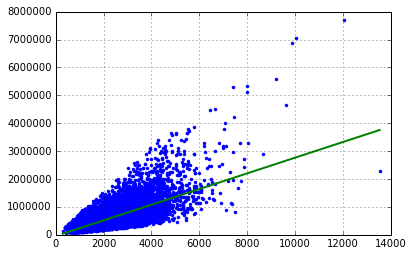

In [26]:
plt.plot(poly1_data['power_1'], poly1_data['price'], '.',
        poly1_data['power_1'], model1.predict(poly1_data), '-', linewidth=2)
plt.grid(True)

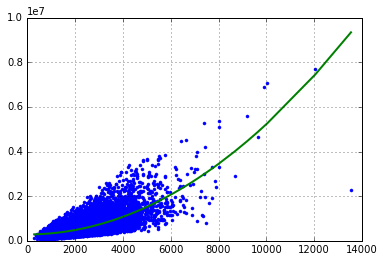

In [27]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']

model2 = gl.linear_regression.create(poly2_data, target = 'price', features = ['power_2'], validation_set = None, verbose=False)

plt.plot(poly2_data['power_1'], poly2_data['price'], '.',
        poly2_data['power_1'], model2.predict(poly2_data), '-', linewidth=2)
plt.grid(True)

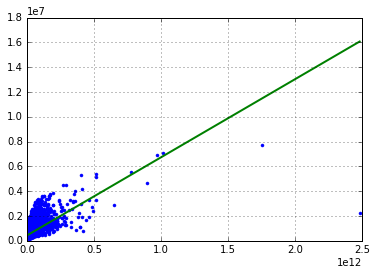

In [28]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']

model3 = gl.linear_regression.create(poly3_data, target = 'price', features = ['power_3'], validation_set = None, verbose=False)

plt.plot(poly3_data['power_3'], poly3_data['price'], '.',
        poly3_data['power_3'], model3.predict(poly3_data), '-', linewidth=2)
plt.grid(True)

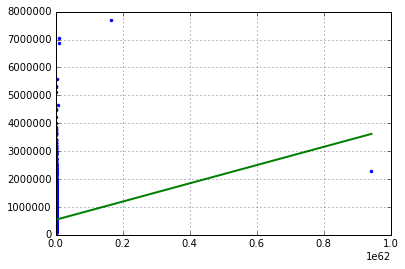

In [29]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

model15 = gl.linear_regression.create(poly15_data, target = 'price', features = ['power_15'], validation_set = None, verbose=False)

plt.plot(poly15_data['power_15'], poly15_data['price'], '.',
        poly15_data['power_15'], model15.predict(poly15_data), '-', linewidth=2)
plt.grid(True)

In [30]:
sales1, sales2 = sales.random_split(.5, seed = 0)
set_1, set_2 =   sales1.random_split(.5, seed = 0)
set_3, set_4 =   sales2.random_split(.5, seed = 0)

name,index,value,stderr
(intercept),None,546048.078681,5297.24780926
power_15,None,3.07735556823e-56,4.0705345523e-57


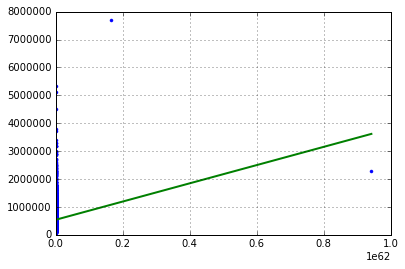

In [32]:
poly15_set_1 = polynomial_sframe(set_1['sqft_living'], 15)
poly15_set_1['price'] = set_1['price']

#print(poly15_set_1.head(2))

model15_set_1 = gl.linear_regression.create(poly15_set_1, target = 'price', features = ['power_15'], validation_set = None, verbose=False)

plt.plot(poly15_set_1['power_15'], poly15_set_1['price'], '.',
        poly15_set_1['power_15'], model15.predict(poly15_set_1), '-', linewidth=2)
plt.grid(True)

model15_set_1.get('coefficients')

name,index,value,stderr
(intercept),None,536958.184414,4604.24979271
power_15,None,1.86752845737e-53,1.17565594161e-54


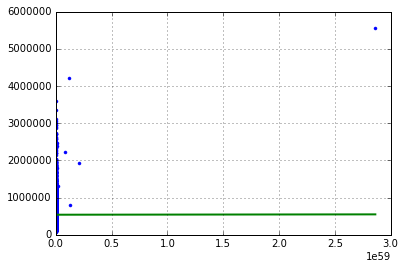

In [33]:
poly15_set_2 = polynomial_sframe(set_2['sqft_living'], 15)
poly15_set_2['price'] = set_2['price']

model15_set_2 = gl.linear_regression.create(poly15_set_2, target = 'price', features = ['power_15'], validation_set = None, verbose=False)

plt.plot(poly15_set_2['power_15'], poly15_set_2['price'], '.',
        poly15_set_2['power_15'], model15.predict(poly15_set_2), '-', linewidth=2)
plt.grid(True)

model15_set_2.get('coefficients')

name,index,value,stderr
(intercept),None,539136.085845,4878.31128872
power_15,None,6.78754270443e-54,2.43108712197e-55


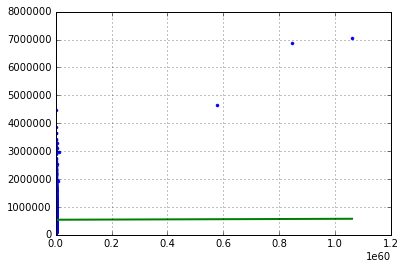

In [34]:
poly15_set_3 = polynomial_sframe(set_3['sqft_living'], 15)
poly15_set_3['price'] = set_3['price']

model15_set_3 = gl.linear_regression.create(poly15_set_3, target = 'price', features = ['power_15'], validation_set = None, verbose=False)

plt.plot(poly15_set_3['power_15'], poly15_set_3['price'], '.',
        poly15_set_3['power_15'], model15.predict(poly15_set_3), '-', linewidth=2)
plt.grid(True)

model15_set_3.get('coefficients')

name,index,value,stderr
(intercept),None,531498.070908,4610.90695361
power_15,None,1.19721254851e-52,8.47787459446e-54


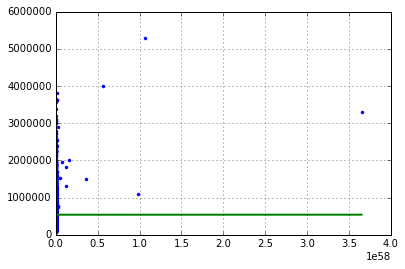

In [35]:
poly15_set_4 = polynomial_sframe(set_4['sqft_living'], 15)
poly15_set_4['price'] = set_4['price']

model15_set_4 = gl.linear_regression.create(poly15_set_4, target = 'price', features = ['power_15'], validation_set = None, verbose=False)

plt.plot(poly15_set_4['power_15'], poly15_set_4['price'], '.',
        poly15_set_4['power_15'], model15.predict(poly15_set_4), '-', linewidth=2)
plt.grid(True)

model15_set_4.get('coefficients')

In [36]:
training_and_validation, testing =  sales.random_split(0.9, seed=1)
training, validation =  training_and_validation.random_split(0.5, seed=1)

In [44]:
RSS_validation = {}
RSS_testing = {}
for degree in range(1, 16):
    model_name = 'model_'+ str(degree)
    dataset_name = 'dataset_'+ str(degree)
    feature_name =  'power_'+ str(degree)
    
    validation_dataset = gl.SFrame()
    validation_dataset[feature_name] = validation['sqft_living']
    validation_dataset['price'] = validation['price']
    
    testing_dataset = gl.SFrame()
    testing_dataset[feature_name] = testing['sqft_living']
    testing_dataset['price'] = testing['price']
    
    dataset_name = polynomial_sframe(training['sqft_living'], degree)
    dataset_name['price'] = training['price']
    
    model_name = gl.linear_regression.create(dataset_name, 
                                             target = 'price', 
                                             features = [feature_name], 
                                             validation_set = None, 
                                             verbose = False)
    validation_dataset['prediction'] = model_name.predict(validation_dataset)
    #print(validation_dataset['prediction'])
    rss = np.sum(np.square(validation_dataset['price'] - validation_dataset['prediction']))
    rss2 = np.sum(np.square(testing_dataset['price'] - model_name.predict(testing_dataset)))

    RSS_validation[degree] = rss
    RSS_testing[degree] = rss2

In [42]:
# sorting the dict
for k in sorted(RSS_validation, key=RSS_validation.get):
    print k,'\t',RSS_validation[k]

1 	6.76709775198e+14
15 	1.32798613616e+15
14 	1.32798617276e+15
13 	1.32798622818e+15
12 	1.32798631529e+15
11 	1.32798645945e+15
10 	1.3279867166e+15
9 	1.32798722997e+15
8 	1.32798845426e+15
7 	1.32799235499e+15
6 	1.32801213086e+15
5 	1.32820334615e+15
4 	1.33156884507e+15
3 	1.39259726666e+15
2 	1.89856122355e+15


In [45]:
RSS_validation

{1: 676709775198047.5,
 2: 1898561223551773.0,
 3: 1392597266660799.2,
 4: 1331568845067163.5,
 5: 1328203346152117.5,
 6: 1328012130862116.5,
 7: 1327992354992895.0,
 8: 1327988454263268.0,
 9: 1327987229968798.2,
 10: 1327986716595350.5,
 11: 1327986459454776.2,
 12: 1327986315288680.0,
 13: 1327986228184177.7,
 14: 1327986172759428.3,
 15: 1327986136160518.0}

In [21]:
3^2

1

In [22]:
3**2

9